In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image = cv2.imread("./input.jpg")

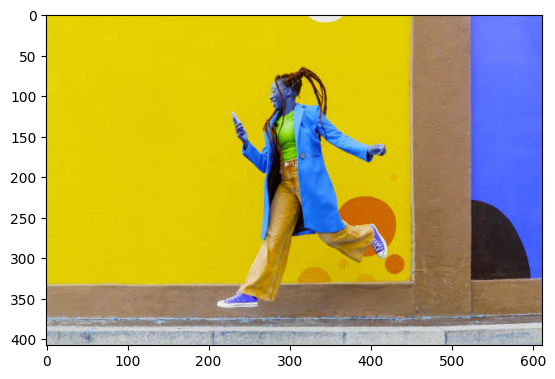

In [4]:
plt.imshow(image)

In [5]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
image_rgb.shape

(408, 612, 3)

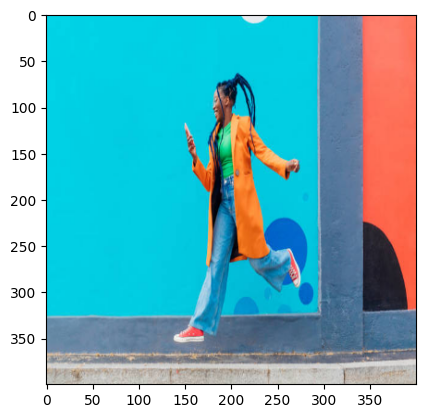

In [12]:
# image resizing

height, width = 400,400

resized_image = cv2.resize(image_rgb, (width, height))

plt.imshow(resized_image)

(204, 306, 3)


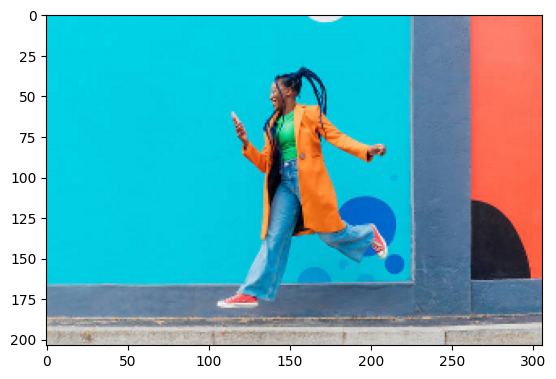

In [13]:
# image scaling

scale_percent = 50

s_width = int(image_rgb.shape[1] * scale_percent / 100)
s_height = int(image_rgb.shape[0] * scale_percent / 100)

scaled_image = cv2.resize(image_rgb, (s_width, s_height), interpolation=cv2.INTER_LANCZOS4)

print(scaled_image.shape)

plt.imshow(scaled_image)

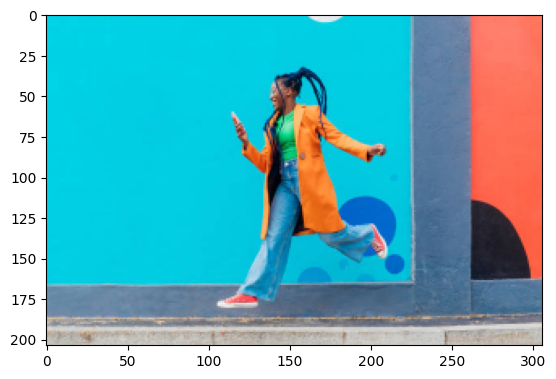

In [14]:

scale_percent = 50

s_width = int(image_rgb.shape[1] * scale_percent / 100)
s_height = int(image_rgb.shape[0] * scale_percent / 100)

scaled_image_INTER_AREA = cv2.resize(image_rgb, (s_width, s_height), interpolation=cv2.INTER_AREA)

plt.imshow(scaled_image_INTER_AREA)

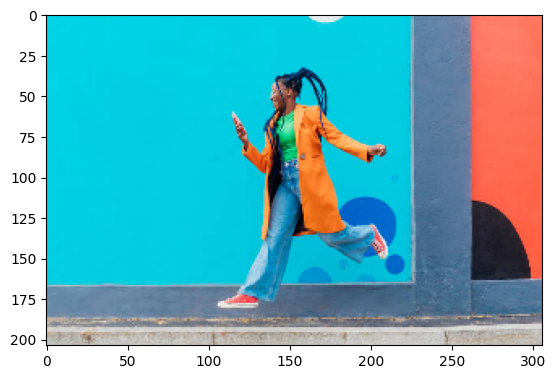

In [15]:

scale_percent = 50

s_width = int(image_rgb.shape[1] * scale_percent / 100)
s_height = int(image_rgb.shape[0] * scale_percent / 100)

scaled_image_INTER_NEAREST = cv2.resize(image_rgb, (s_width, s_height), interpolation=cv2.INTER_NEAREST)

plt.imshow(scaled_image_INTER_NEAREST)

### Flipping, Rotate and Crop

In [20]:
horziontal_flip = cv2.flip(image, 1) # 1 for horizontal, 0 for vertical, -1 both

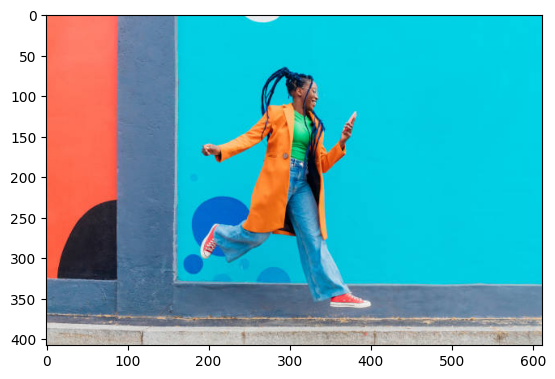

In [22]:
plt.imshow(cv2.cvtColor(horziontal_flip,cv2.COLOR_BGR2RGB))

In [23]:
rotated_image = cv2.rotate(image_rgb, cv2.ROTATE_90_COUNTERCLOCKWISE)

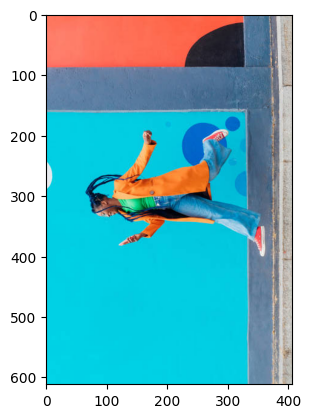

In [24]:
plt.imshow(rotated_image)

In [25]:
x_start, y_start = 400, 300
x_end, y_end = 800, 900

In [26]:
cropped_image = image_rgb[y_start:y_end, x_start:x_end]

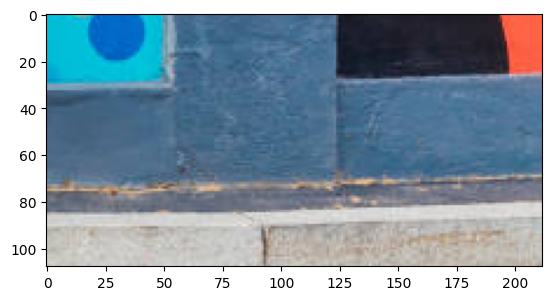

In [27]:
plt.imshow(cropped_image)

## Transformations

In [6]:
rows, cols, _ = image_rgb.shape

input_points = np.float32([[50,50], [cols-50, 50],[50,rows-50],[cols-50,rows-50]])

output_points = np.float32([[10,100],[cols-100,50],[100,rows-10],[cols-50,rows-100]])

In [7]:
M = cv2.getPerspectiveTransform(input_points,output_points)

In [8]:
print(M)

[[ 1.19278755e+00  3.23209289e-01 -6.55080600e+01]
 [-8.25652031e-02  1.08521542e+00  5.27853074e+01]
 [ 3.58809574e-04  2.24754049e-04  1.00000000e+00]]


In [11]:
perspective_transform = cv2.warpPerspective(image_rgb,M, (cols, rows))

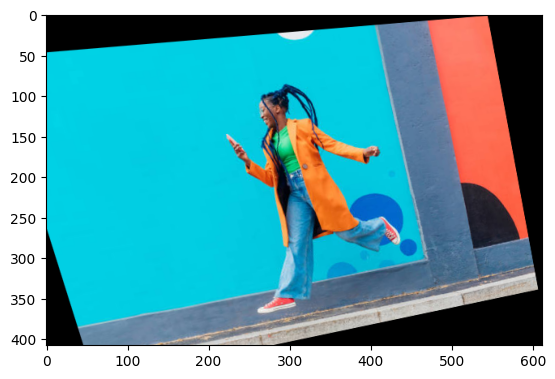

In [12]:
plt.imshow(perspective_transform)

In [14]:
input = np.float32([[50,50],[200,50],[50,200]])
output = np.float32([[10,100],[200,50],[100,250]])

In [15]:
M = cv2.getAffineTransform(input, output)

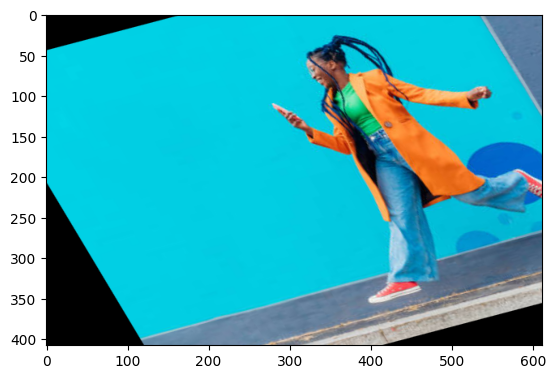

In [16]:
affine_image = cv2.warpAffine(image_rgb, M, (cols, rows))
plt.imshow(affine_image)

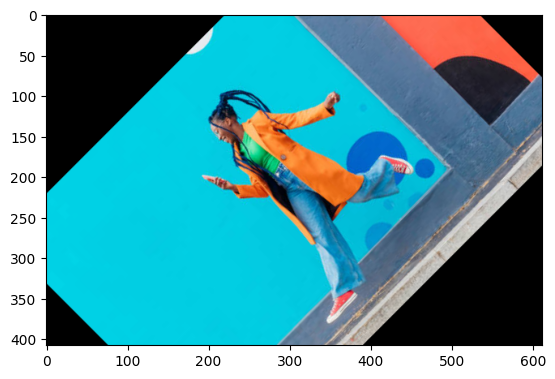

In [18]:
# Rotation

angle = 45
center = (cols //2 , rows//2)

scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(image_rgb, M, (cols, rows))
plt.imshow(rotated_image)